In [17]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('INFO').getOrCreate()
sc = spark.sparkContext

In [5]:
df = spark.read.csv('BostonCrime2.0.csv', header = True, inferSchema = True)
df.show()

+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|INCIDENTNUMBER|OFFENSECODE|    OFFENSECODEGROUP|DISTRICT|YEAR|MONTH|DAYOFWEEK|HOUR|   UCRPART|        STREET|SHOOTING|
+--------------+-----------+--------------------+--------+----+-----+---------+----+----------+--------------+--------+
|             1|       1102|               Fraud|      D4|2015|   12|   Sunday|  14|  Part Two|  WESTLAND AVE|       N|
|             2|        619|             Larceny|      D4|2015|   12|   Sunday|  14|  Part One|  WESTLAND AVE|       N|
|             3|       1107|               Fraud|     E18|2015|    7|Wednesday|  12|  Part Two|   OAKCREST RD|       N|
|             4|       1107|               Fraud|      C6|2015|   11| Thursday|   8|  Part Two|   E FOURTH ST|       N|
|             5|       2647|               Other|      D4|2015|   10| Saturday|  13|  Part Two|   BERKELEY ST|       N|
|             6|       1102|            

In [6]:
df.printSchema()

root
 |-- INCIDENTNUMBER: integer (nullable = true)
 |-- OFFENSECODE: integer (nullable = true)
 |-- OFFENSECODEGROUP: string (nullable = true)
 |-- DISTRICT: string (nullable = true)
 |-- YEAR: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAYOFWEEK: string (nullable = true)
 |-- HOUR: integer (nullable = true)
 |-- UCRPART: string (nullable = true)
 |-- STREET: string (nullable = true)
 |-- SHOOTING: string (nullable = true)



In [7]:
df1 = pd.read_csv('BostonCrime2.0.csv')

In [10]:
print(df1.shape)

(800, 11)


In [11]:
print(df1.columns)

Index(['INCIDENTNUMBER', 'OFFENSECODE', 'OFFENSECODEGROUP', 'DISTRICT', 'YEAR',
       'MONTH', 'DAYOFWEEK', 'HOUR', 'UCRPART', 'STREET', 'SHOOTING'],
      dtype='object')


In [8]:
df1.describe()

,INCIDENTNUMBER,OFFENSECODE,YEAR,MONTH,HOUR
count,800.0000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,1949.248750,2016.503750,8.202500,15.490000
std,231.0844,1095.330431,1.120962,2.677771,6.011662
min,1.0000,301.000000,2015.000000,1.000000,1.000000
25%,200.7500,1102.000000,2015.750000,7.000000,12.000000
50%,400.5000,1402.000000,2017.000000,8.000000,14.000000
75%,600.2500,3115.000000,2018.000000,10.000000,24.000000
max,800.0000,3831.000000,2018.000000,12.000000,24.000000


In [12]:
df1.head(20)

,INCIDENTNUMBER,OFFENSECODE,OFFENSECODEGROUP,DISTRICT,YEAR,MONTH,DAYOFWEEK,HOUR,UCRPART,STREET,SHOOTING
0,1,1102,Fraud,D4,2015,12,Sunday,14,Part Two,WESTLAND AVE,N
1,2,619,Larceny,D4,2015,12,Sunday,14,Part One,WESTLAND AVE,N
2,3,1107,Fraud,E18,2015,7,Wednesday,12,Part Two,OAKCREST RD,N
3,4,1107,Fraud,C6,2015,11,Thursday,8,Part Two,E FOURTH ST,N
4,5,2647,Other,D4,2015,10,Saturday,13,Part Two,BERKELEY ST,N
5,6,1102,Fraud,D14,2015,9,Tuesday,11,Part Two,ALLSTON ST,N
6,7,3201,Property Lost,C11,2015,8,Thursday,8,Part Three,EDWIN ST,N
7,8,1102,Fraud,C11,2015,10,Wednesday,12,Part Two,WASHINGTON ST,N
8,9,1102,Fraud,C11,2015,8,Saturday,6,Part Two,DITSON ST,N
9,10,1107,Fraud,A1,2015,8,Saturday,15,Part Two,WASHINGTON ST,N


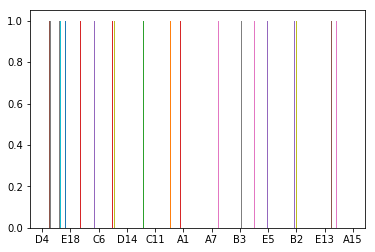

In [13]:
plt.hist(df1["DISTRICT"])
plt.show()

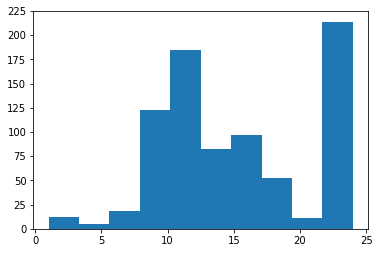

In [14]:
plt.hist(df1["HOUR"])
plt.show()

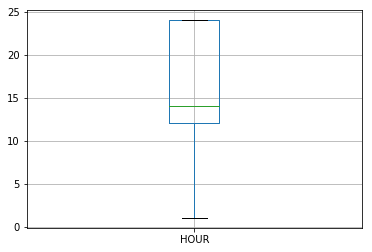

In [16]:
df1.boxplot(column='HOUR')